<a href="https://colab.research.google.com/github/nithinivi/Deep_Learning_Discussion/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Install of packagess
!pip install celluloid

In [3]:
import numpy as np
import matplotlib as cm 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec

from celluloid import Camera

import celluloid
from scipy.special import expit, logit



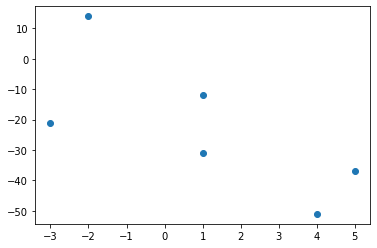

In [4]:

x_train = np.array([ # two independent variables
    [1,-2],
    [2,1],
    [4,1],
    [5,-3],
    [6,4],
    [7,5]
])

y_train = np.array([ 
    [14],
    [-12],
    [-31],
    [-21],
    [-51],
    [-37]
])
plt.scatter(x_train[:,1], y_train)

# Linear Regression Model

In [12]:
# define (Multi-)linear regression model:
class LinearRegression(object): 
    def __init__(self,x,y, lr=0.01):
        self.lr=lr
        self.w=np.ones((1, x.shape[1])).T*3 #set starting weight(s) to 3.
        self.b=np.ones((1, y.shape[1]))*(-1)# set starting bias to -1.

    def e(self, x, y):
      pred = x@self.w+self.b # predicted y-values
      e=y-pred    # error term
      return e  
    
    def cost(self,x,y):    
      e = self.e(x,y) 
      return np.mean(e**2)  # mean squared error

    def step(self, x,y): # update parameters
      e = self.e(x,y) 
      # update weight matrix:
      self.w = (self.w.T-self.lr*(np.mean(e*(-2*x), axis=0))).T 
      # update bias: 
      self.b = self.b - self.lr*(np.mean(e*(-2),axis=0)) 
      
    def fit(self, x,y, numberOfEpochs=1000000):
        # create arrays to store weights, biases, costs and cl-values in:
        self.AllWeights= np.zeros((numberOfEpochs, x.shape[1])) 
        self.AllBiases= np.zeros(numberOfEpochs)
        self.AllCosts= np.zeros(numberOfEpochs)
        self.cl= np.zeros((numberOfEpochs,len(x))) # cl: (predicted) points for connection lines!
       
        
        for step in range(numberOfEpochs): 
            # for each step of gradient descent assign ...
            # ... new parameter value to respective array element:
            self.AllWeights[step]=self.w.T   
            self.AllBiases[step]=self.b
            self.AllCosts[step]=self.cost(x,y)
            self.cl[step]=(self.predict(x)).T.flatten() # y-values predicted by model 
            self.step(x,y) # update parameters

    def predict(self, x):
        return (x @ self.w + self.b) # return predicted values  

model=LinearRegression(x_train,y_train, lr=0.001) # set learning rate
model.fit(x_train,y_train, numberOfEpochs=100000) # set number of epochs


In [13]:
w0=model.AllWeights.T[0]
w1=model.AllWeights.T[1]
b= model.AllBiases
c=model.AllCosts
cl=model.cl

print("Final weights: "+ str(model.w)) # print final model parameters
print("Final bias: "+ str(model.b))
print("Final costs: " + str(model.cost(x_train,y_train)))

Final weights: [[-6.75922888]
 [-2.07075472]]
Final bias: [[7.23420837]]
Final costs: 75.63518594476345


In [14]:


# cross-check results with sklearn's linear regression model:
import sklearn
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)



[[-6.75922888 -2.07075472]]
[7.23420837]


In [32]:

a1 = np.arange(0,50,1).tolist()
a2=np.arange(50,100,5).tolist()
a3=np.arange(100,1000,50).tolist()
a4=np.arange(1000,20000,500).tolist()
points_ = a1+a2+a3+a4

def pred_meshgrid(x,w,b):  # predicts Y-values for regression plane spanned by x0s and x1s
        p=x @ w.T + b   
        return p
    
x0s = np.linspace(-3,8, 35) # set range of values for plane 
x1s = np.linspace(-4, 6, 35)
M1, M2 = np.meshgrid(x0s, x1s) #  set up first meshgrid in order to create regression plane


In [55]:

x_train[0]

array([ 1, -2])

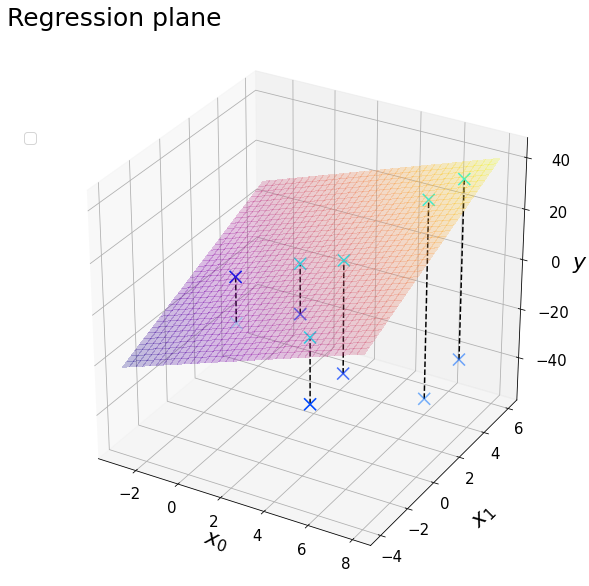

In [79]:

# Create first animation (regression plane & parameter values): 
fig = plt.figure(figsize=(10,10)) # create figure
fig.suptitle('Regression plane', fontsize=25,x=0.25, y=0.92) # title of figure
labelsize_=15 # tick label font size 
fontsize_=22 # axis label font size 
labelpad_=8 # label pad

ax0=fig.add_subplot(111, projection='3d') # add supblots
ax0.tick_params(axis='both', which='major', labelsize=labelsize_) # set tick label font size
ax0.tick_params(axis='z', pad=15, which='major', labelsize=labelsize_) # set axis padding
ax0.set_xlabel(r'$x_0$', fontsize=fontsize_, labelpad=7) # set axis labels and axis label font size
ax0.set_ylabel(r'$x_1$', fontsize=fontsize_, labelpad=19)
ax0.set_zlabel(r'$y$', fontsize=fontsize_, labelpad=19)

i=0

w=np.array([[w0[i],w1[i]]]) # weights with respect to epoch
b_= b[i]     # b with respect to epoch
cl_=cl[i]   # predicted y-values with respect to epoch

ax0.legend([f'epochs: {i}'], 
           loc=(0, 0.8), 
           fontsize=15) # set legend position

zs = np.array([pred_meshgrid(np.array([[wp0,wp1]]),
                             w,
                             np.array([[b_]])) 
                            for wp0, wp1 in zip(np.ravel(M1), 
                                                np.ravel(M2))])

Z = zs.reshape(M1.shape)# z-values of regression plane

ax0.plot_surface(M1, M2, Z, 
                 rstride=1,
                 cstride=1, # plot regression plane
                 color='blue',
                 alpha=0.25,
                 cmap=plt.get_cmap("plasma"),
                 label=str(i),
                antialiased=False)

ax0.scatter(x_train.T[0],
            x_train.T[1] ,  
            y_train,  # plot training data points
            marker="x", 
            s=12**2,
            color="blue")

for j in range(6):    
  # plot connecting lines (between predicted y-values and training data points):
  x = [x_train[j][0],x_train[j][0]]
  y = [x_train[j][1],x_train[j][1]]
  # y, y_hat
  z = [float(y_train[j]),cl_[j]]
  
  ax0.scatter(x,y,z,
              color='cyan',
              marker="x",
              s=12**2)

  ax0.plot(x,y,z, 
           color='black', 
           linewidth=1.5,
           linestyle='dashed')


plt.show()